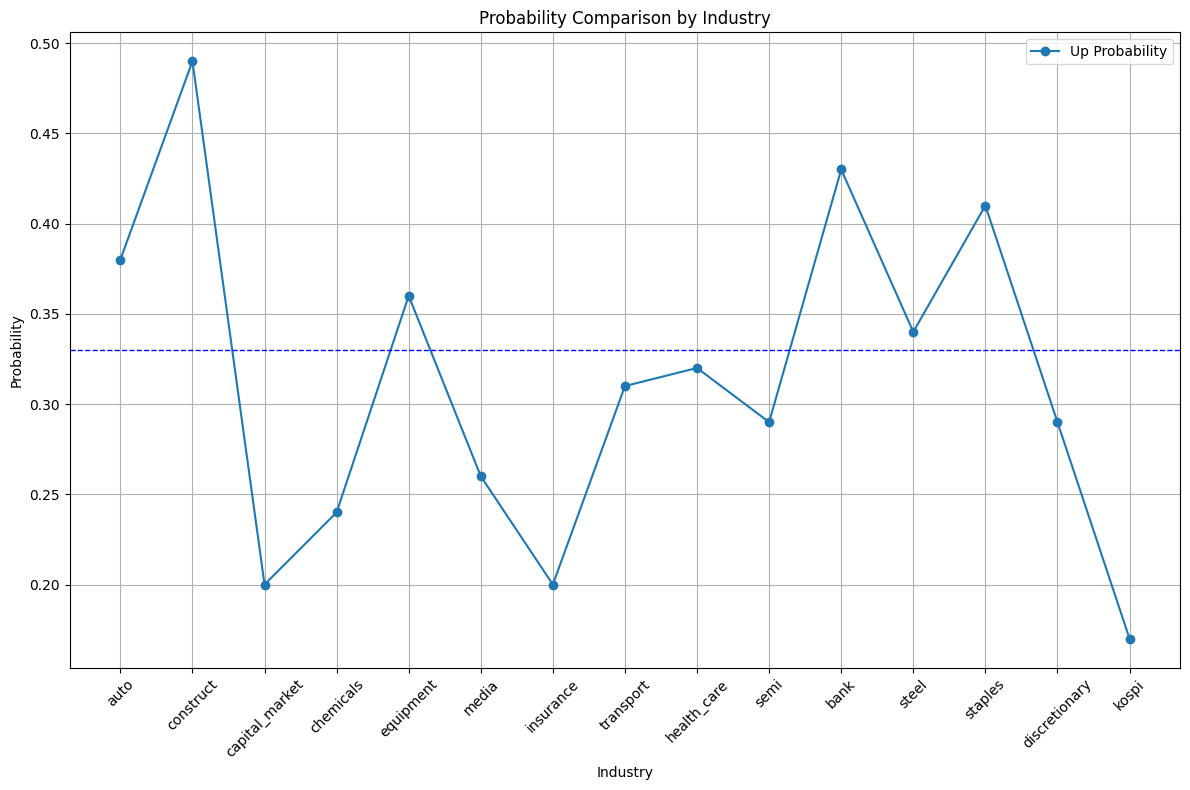

In [27]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Industry': ['auto', 'construct', 'capital_market', 'chemicals', 'equipment', 'media', 'insurance', 'transport', 'health_care', 'semi', 'bank', 'steel', 'staples', 'discretionary', 'kospi'],
    'down': [0.42, 0.21, 0.56, 0.46, 0.49, 0.17, 0.20, 0.34, 0.31, 0.39, 0.30, 0.32, 0.31, 0.18, 0.43],
    'neutral': [0.21, 0.30, 0.24, 0.31, 0.15, 0.57, 0.60, 0.34, 0.37, 0.32, 0.27, 0.34, 0.28, 0.53, 0.40],
    'up': [0.38, 0.49, 0.20, 0.24, 0.36, 0.26, 0.20, 0.31, 0.32, 0.29, 0.43, 0.34, 0.41, 0.29, 0.17]
}


plt.figure(figsize=(12, 8))

#plt.plot(industries, down_probs, marker='o', label='Down Probability')
#plt.plot(industries, neutral_probs, marker='o', label='Neutral Probability')
plt.plot(industries, up_probs, marker='o', label='Up Probability')
plt.axhline(y=0.33, color='blue', linestyle='--', linewidth=1)

plt.title('Probability Comparison by Industry')
plt.xlabel('Industry')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


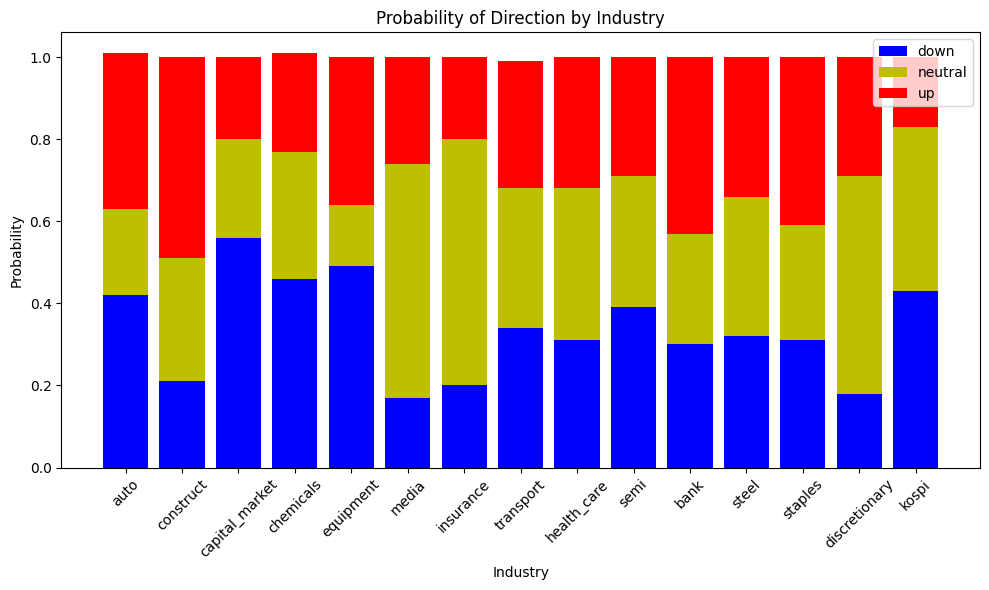

In [28]:
df = pd.DataFrame(data)
df_sorted = df.sort_values(by='up', ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.bar(df['Industry'], df['down'], label='down', color='b')
plt.bar(df['Industry'], df['neutral'], label='neutral', color='y', bottom=df['down'])
plt.bar(df['Industry'], df['up'], label='up', color='r', bottom=df['down'] + df['neutral'])

plt.xlabel('Industry')
plt.ylabel('Probability')
plt.title('Probability of Direction by Industry')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


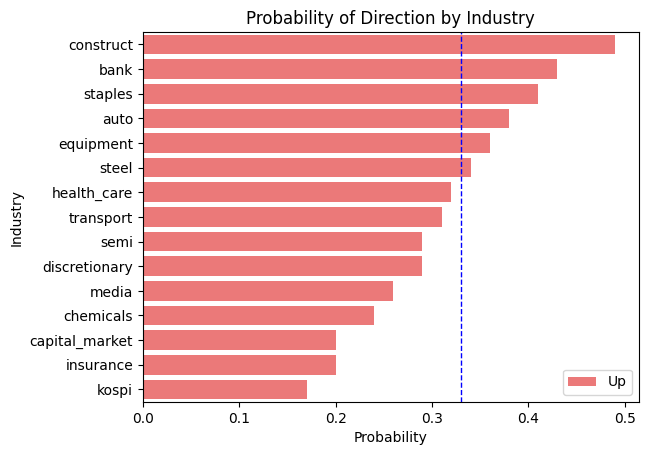

In [29]:

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by 'up' probability in descending order
df_sorted = df.sort_values(by='up', ascending=False)

# Plotting using Seaborn
#sns.barplot(x=df_sorted['down'], y=df_sorted['Industry'], color='blue', alpha=0.6, label='Down')
#sns.barplot(x=df_sorted['neutral'], y=df_sorted['Industry'], color='yellow', alpha=0.6, label='Neutral')
sns.barplot(x=df_sorted['up'], y=df_sorted['Industry'], color='red', alpha=0.6, label='Up')
plt.axvline(x=0.33, color='blue', linestyle='--', linewidth=1)

# Adding labels and title
plt.xlabel('Probability')
plt.ylabel('Industry')
plt.title('Probability of Direction by Industry')

# Adding legend
plt.legend()

# Show plot
plt.show()


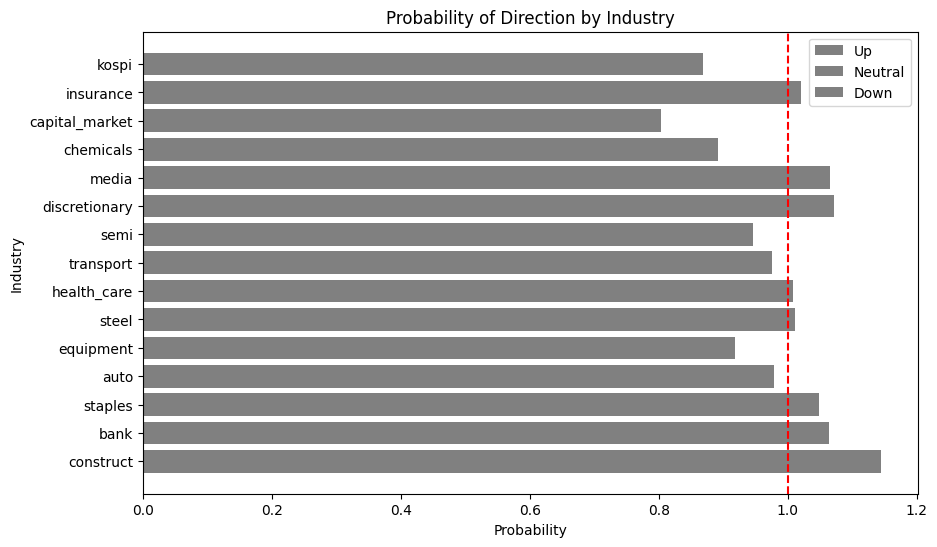

In [30]:
# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Adjust probabilities
df['up'] *= 1.5
df['neutral'] *= 0.7*1.5
df['down'] *= 0.3*1.5


# Sort DataFrame by 'up' probabilities in descending order
df_sorted = df.sort_values(by='up', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars
plt.barh(df_sorted['Industry'], df_sorted['up'], color='gray', label='Up')
plt.barh(df_sorted['Industry'], df_sorted['neutral'], color='gray', label='Neutral', left=df_sorted['up'])
plt.barh(df_sorted['Industry'], df_sorted['down'], color='gray', label='Down', left=df_sorted['up'] + df_sorted['neutral'])

# Filter bars with total probability > 1
df_filtered = df_sorted[df_sorted['up'] + df_sorted['neutral'] + df_sorted['down'] > 1]

# Plot bars for filtered data
plt.barh(df_filtered['Industry'], df_filtered['up'], color='gray')
plt.barh(df_filtered['Industry'], df_filtered['neutral'], color='gray', left=df_filtered['up'])
plt.barh(df_filtered['Industry'], df_filtered['down'], color='gray', left=df_filtered['up'] + df_filtered['neutral'])

plt.axvline(x=1, color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Probability')
plt.ylabel('Industry')
plt.title('Probability of Direction by Industry')

# Adding legend
plt.legend()

# Show plot
plt.show()


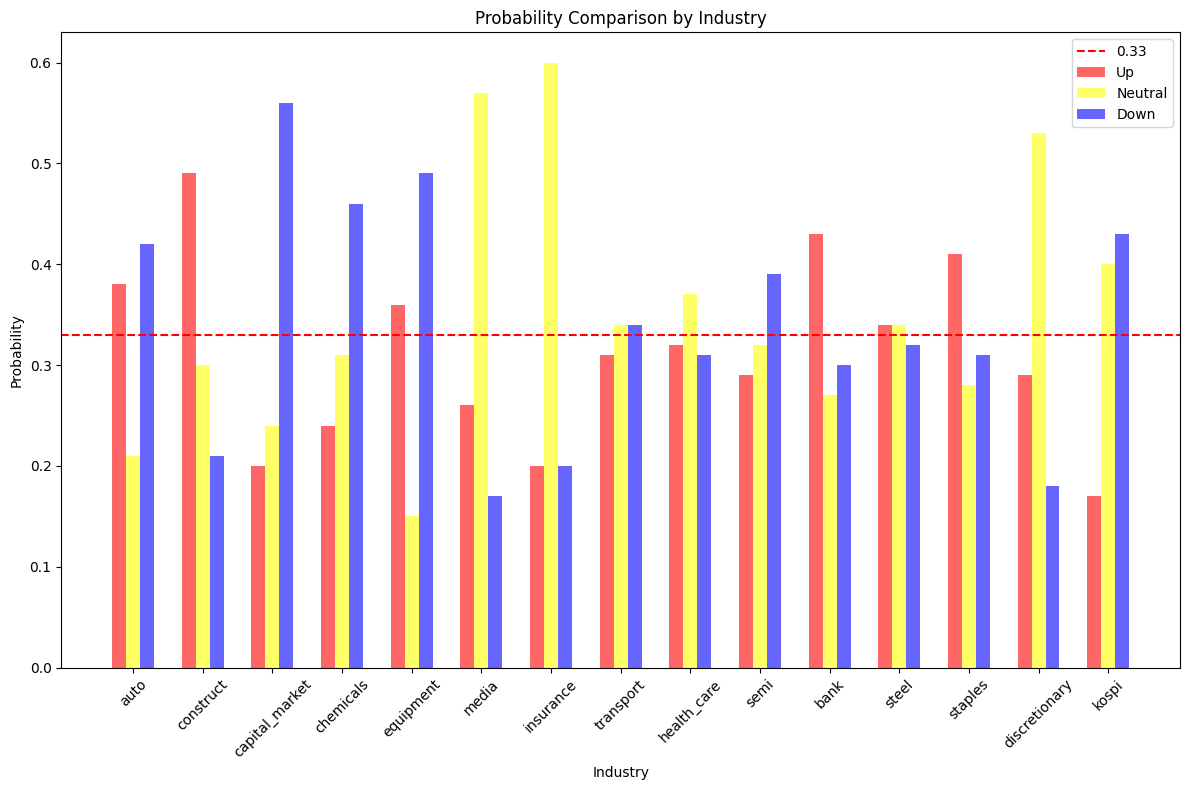

In [33]:
import numpy as np
# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대의 위치 설정
bar_width = 0.2
index = np.arange(len(df['Industry']))

# Up 막대 그리기
plt.bar(index, df['up'], color='red', alpha=0.6, width=bar_width, label='Up')

# Neutral 막대 그리기
plt.bar(index + bar_width, df['neutral'], color='yellow', alpha=0.6, width=bar_width, label='Neutral')

# Down 막대 그리기
plt.bar(index + 2 * bar_width, df['down'], color='blue', alpha=0.6, width=bar_width, label='Down')
plt.axhline(y=0.33, color='red', linestyle='--', label='0.33')

# X 축 설정
plt.xlabel('Industry')
plt.ylabel('Probability')
plt.title('Probability Comparison by Industry')
plt.xticks(index + bar_width, df['Industry'], rotation=45)

# 범례 표시
plt.legend()

plt.tight_layout()
plt.show()

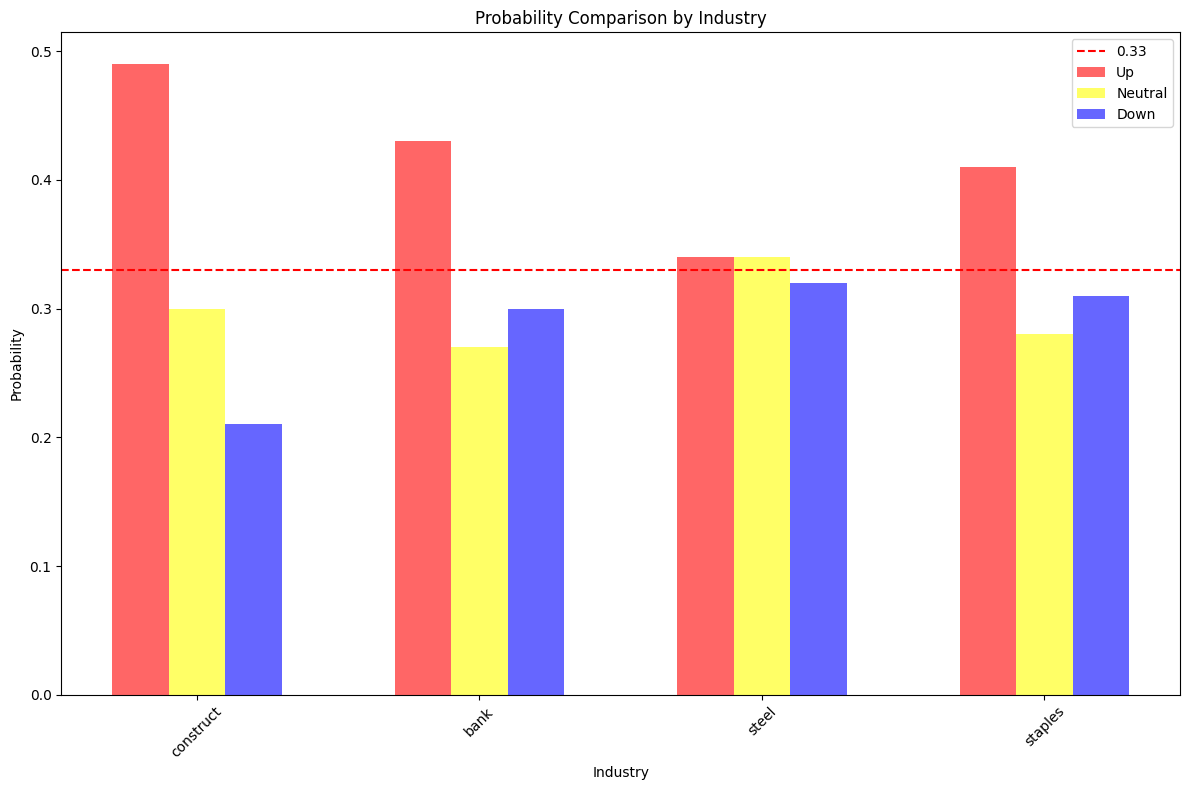

In [41]:
import numpy as np

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# down 열이 0.33보다 작거나 같고, up 열이 0.33보다 큰 행들만 선택
df_filtered = df[(df['down'] <= 0.33) & (df['up'] >= 0.33)]

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대의 위치 설정
bar_width = 0.2
index = np.arange(len(df_filtered['Industry']))  # down이 0.33보다 작거나 같은 산업만을 대상으로 인덱스 설정

# Up 막대 그리기
plt.bar(index, df_filtered['up'], color='red', alpha=0.6, width=bar_width, label='Up')

# Neutral 막대 그리기
plt.bar(index + bar_width, df_filtered['neutral'], color='yellow', alpha=0.6, width=bar_width, label='Neutral')

# Down 막대 그리기
plt.bar(index + 2 * bar_width, df_filtered['down'], color='blue', alpha=0.6, width=bar_width, label='Down')
plt.axhline(y=0.33, color='red', linestyle='--', label='0.33')

# X 축 설정
plt.xlabel('Industry')
plt.ylabel('Probability')
plt.title('Probability Comparison by Industry')
plt.xticks(index + bar_width, df_filtered['Industry'], rotation=45)

# 범례 표시
plt.legend()

plt.tight_layout()
plt.show()
